# Structure

## 1D CNN
### 1. model structure
### 2. 介紹跑幾圈overfitting
### 3. ACC & LOSS & Confusion Matrix using <font color="red">5:2:3<font>
### 4. ACC & LOSS & Confusion Matrix using <font color="red">5-fold<font>
### 5. Grid Search with <font color="red">Learning Rate<font> & <font color="red">Batch Size<font>
### 6. F1-score (拿來比較用)

## 2D CNN
### 1. model structure
### 2. 介紹跑幾圈overfitting
### 3. ACC & LOSS & Confusion Matrix using <font color="red">5:2:3<font>
### 4. ACC & LOSS & Confusion Matrix using <font color="red">5-fold<font>
### 5. Grid Search with <font color="red">Learning Rate<font> & <font color="red">Batch Size<font>
### 6. F1-score (拿來比較用)

# 1D CNN

## 1. Model Structure

 畫架構圖出來 以stack方式呈現

In [ ]:
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = "softmax"))

## 2. epoch

In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)


try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")


model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = "softmax"))

print(model.summary())


adam = Adam(lr = 0.001)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

# graph = TensorBoard()
# early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=100,
                            validation_data=(validationData, validationLabel),
#                             callbacks=[early_stop],
                            batch_size=70, 
                            verbose=1)
# model.save('model_30s.h5')

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)
Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
activation_2 (Activation)    (None, 4491, 

5078/5078 [==============================] - 5s 960us/step - loss: 0.4633 - acc: 0.8312 - val_loss: 0.5093 - val_acc: 0.7982
Epoch 21/100
5078/5078 [==============================] - 5s 956us/step - loss: 0.4545 - acc: 0.8326 - val_loss: 0.4820 - val_acc: 0.8091
Epoch 22/100
5078/5078 [==============================] - 5s 958us/step - loss: 0.4366 - acc: 0.8379 - val_loss: 0.5074 - val_acc: 0.8027
Epoch 23/100
5078/5078 [==============================] - 5s 955us/step - loss: 0.4346 - acc: 0.8417 - val_loss: 0.5005 - val_acc: 0.8095
Epoch 24/100
5078/5078 [==============================] - 5s 953us/step - loss: 0.4299 - acc: 0.8399 - val_loss: 0.4975 - val_acc: 0.8105
Epoch 25/100
5078/5078 [==============================] - 5s 957us/step - loss: 0.4265 - acc: 0.8401 - val_loss: 0.4826 - val_acc: 0.8155
Epoch 26/100
5078/5078 [==============================] - 5s 953us/step - loss: 0.4112 - acc: 0.8484 - val_loss: 0.5181 - val_acc: 0.8071
Epoch 27/100
5078/5078 [=======================

### ACC

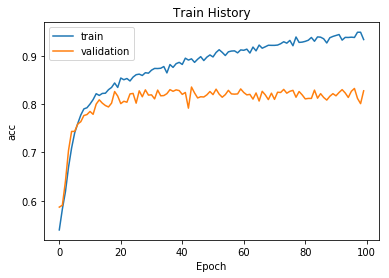

In [2]:
show_plot('acc', train_history_1)

### LOSS

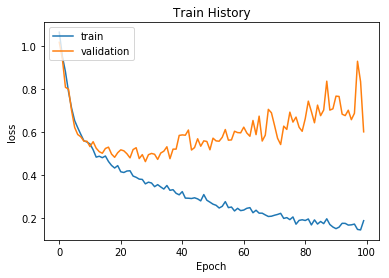

In [3]:
show_plot('loss', train_history_1)

## 3. ACC & LOSS & Confusion Matrix using 5:2:3

### Training ACC & LOSS

In [2]:
evaluation = model.evaluate(x = trainData, y = trainLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

5078/5078 [==============================] - 2s 385us/step
Loss: 0.100, Accuracy: 0.980


### Testing ACC & LOSS

In [3]:
evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

3041/3041 [==============================] - 1s 373us/step
Loss: 0.580, Accuracy: 0.825


### Confusion Matrix

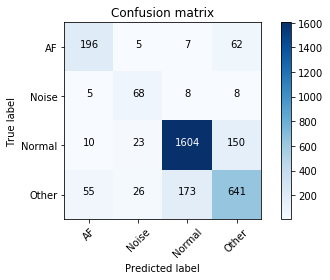

In [11]:
from sklearn.metrics import confusion_matrix

import itertools
# test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(testL, test_prediction)
plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'],
                      title='Confusion matrix')

## 4. ACC & LOSS & Confusion Matrix using 5-fold

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1-Fold
8120/8120 [==============================] - 3s 353us/step
Training:
Loss: 0.206, Accuracy: 0.938
2031/2031 [==============================] - 1s 361us/step
Testing:
Loss: 0.423, Accuracy: 0.848
F1-score:
[0.80606061 0.62385321 0.90708661 0.74607572]
2-Fold
8121/8121 [==============================] - 3s 418us/step
Training:
Loss: 0.279, Accuracy: 0.898
2030/2030 [==============================] - 1s 369us/step
Testing:
Loss: 0.463, Accuracy: 0.837
F1-score:
[0.76549865 0.64566929 0.90268322 0.73239437]
3-Fold
8121/8121 [==============================] - 3s 354us/step
Training:
Loss: 0.233, Accuracy: 0.920
2030/2030 [==============================] - 1s 359us/step
Testing:
Loss: 0.461, Accuracy: 0.852
F1-score:
[0.80898876 0.53763441 0.90623742 0.77087034]
4-Fold
8121/8121 [==============================] - 3s 354us/step
Training:
Loss: 0.267, Accuracy: 0.915
2030/2030 [==============================] - 1s 359us/step
Testing:
Loss: 0.446, Accuracy: 0.848
F1-score:
[0.79895561 0.

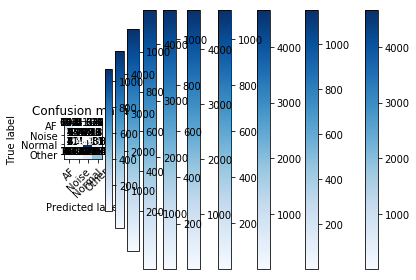

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)
trainD = np.append(trainD, testD, axis=0)
trainL = np.append(trainL, testL, axis=0)

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
# print('Train Data:', trainData.shape)
# print('Train Label: ', trainLabel.shape)

#--------------------------------------------

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
# print(kf)

#--------------------------------------------

from sklearn.metrics import f1_score

def create_model():
    model = Sequential()
    model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 32, kernel_size = 7))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 7))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 128, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 128, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 256, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 256, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 512, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 512, kernel_size = 3))
    model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(4, activation = "softmax"))
    
    model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=['accuracy'])

    return model

fold = 1

for train_index, test_index in kf.split(trainData):
    
    print('{}-Fold'.format(fold))
    model = create_model()
    early_stop = EarlyStopping(patience=20)
    history = model.fit(x = trainData[train_index],
                        y = trainLabel[train_index],
                        epochs=100,
                        validation_data=(trainData[test_index], trainLabel[test_index]),
                        callbacks=[early_stop],
                        batch_size=70, 
                        verbose=0)
    
    evaluation = model.evaluate(x = trainData[train_index], y = trainLabel[train_index])
    print('Training:')
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
    test_prediction = model.predict_classes(trainData[train_index], batch_size=1)
    cnf_matrix = confusion_matrix(trainLabel[train_index].argmax(axis=1), test_prediction)
    plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'],
                      title='Confusion matrix')
    
    evaluation = model.evaluate(x = trainData[test_index], y = trainLabel[test_index])
    print('Testing:')
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
    test_prediction = model.predict_classes(trainData[test_index], batch_size=1)
    cnf_matrix = confusion_matrix(trainLabel[test_index].argmax(axis=1), test_prediction)
    plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'],
                      title='Confusion matrix')
    
    validation_prediction = model.predict_classes(trainData[test_index], batch_size=100)
    validation_prediction = np_utils.to_categorical(validation_prediction, 4)
    result = f1_score(trainLabel[test_index], validation_prediction, average=None)
    print('F1-score:')
    print(result)
    
    fold = fold + 1
    del model
    

那個圖不用理他

## 5. Grid Search

看 Appendix 1

## 6. F1-score

結果在 4. ACC & LOSS & Confusion Matrix using 5-fold 那邊
做表格 然後最後再算總平均 再去跟論文比較

# 2D CNN

## 1. Model Structure

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same', data_format="channels_last", input_shape = (data.shape[1], data.shape[2], 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(160, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

## 2. epoch

Using original spect array

In [ ]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/2D_spect/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/2D_spect/validate_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/2D_spect/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], trainD.shape[2], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], validationD.shape[2], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], testD.shape[2], 1))
testLabel = np_utils.to_categorical(testL, 4)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same', data_format="channels_last", input_shape = (data.shape[1], data.shape[2], 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(160, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

print(model.summery())

adam = Adam(lr = 0.0005)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

# early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=100,
                            validation_data=(validationData, validationLabel),
#                             callbacks=[early_stop],
                            batch_size=70, 
                            verbose=1)


import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/2D_spect/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/2D_spect/validate_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/2D_spect/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], trainD.shape[2], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], validationD.shape[2], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], testD.shape[2], 1))
testLabel = np_utils.to_categorical(testL, 4)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

model = Sequential() 
model.add(Conv2D(filters = 32, kernel_size = 3, data_format="channels_last", input_shape = (trainData.shape[1], trainData.shape[2], 1)))
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(160, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

print(model.summary())

adam = Adam(lr=0.001)
early_stop = EarlyStopping(patience=20)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])
batch_s = 80
train_history = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=200,
                          validation_data=(validationData, validationLabel),
                          callbacks=[early_stop],
                          batch_size=batch_s*1, 
                          verbose=1)


import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 65, 139, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 65, 139, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 65, 139, 1)
Test Label:  (3041, 4)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 137, 32)       320       
_________________________________________________________________
activation_1 (Activation)    (None, 63, 137, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 135, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 67, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 65, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 63, 6

5078/5078 [==============================] - 3s 668us/step - loss: 0.5940 - acc: 0.7611 - val_loss: 0.6794 - val_acc: 0.7323
Epoch 97/200
5078/5078 [==============================] - 3s 669us/step - loss: 0.5839 - acc: 0.7586 - val_loss: 0.6837 - val_acc: 0.7288
Epoch 98/200
5078/5078 [==============================] - 3s 664us/step - loss: 0.5847 - acc: 0.7613 - val_loss: 0.6928 - val_acc: 0.7037
Epoch 99/200
5078/5078 [==============================] - 3s 657us/step - loss: 0.5837 - acc: 0.7625 - val_loss: 0.6962 - val_acc: 0.7264
Epoch 100/200
5078/5078 [==============================] - 3s 632us/step - loss: 0.5785 - acc: 0.7643 - val_loss: 0.6727 - val_acc: 0.7279
Epoch 101/200
5078/5078 [==============================] - 3s 662us/step - loss: 0.5921 - acc: 0.7629 - val_loss: 0.6859 - val_acc: 0.7338
Epoch 102/200
5078/5078 [==============================] - 3s 632us/step - loss: 0.5924 - acc: 0.7617 - val_loss: 0.6870 - val_acc: 0.7338
Epoch 103/200
5078/5078 [===================

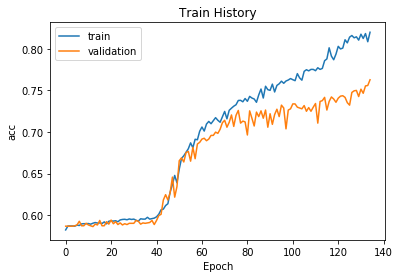

In [2]:
show_plot('acc', train_history)

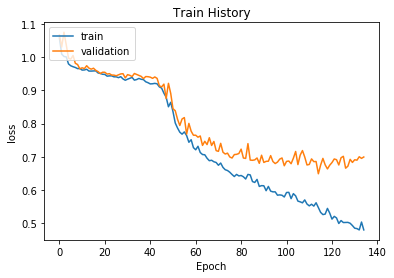

In [3]:
show_plot('loss', train_history)

Using RGB spect

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
np.set_printoptions(suppress=True)

data = np.load("/home/hsiehch/30s/2D_spect_img/data_RGB.npy")
labels = np.load('/home/hsiehch/30s/2D_spect_img/labels.npy')

data = data / 255
labels = np_utils.to_categorical(labels, 4)

print(data.shape)
print(labels.shape)

#---------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels)

#---------------------------------------

model = Sequential() 
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same', data_format="channels_last", input_shape = (data.shape[1], data.shape[2], 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(160, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

print(model.summary())

#---------------------------------------

adam = Adam(lr=0.0005)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])
batch_s = 80
early_stop = EarlyStopping(patience=20)
train_history = model.fit(x = X_train, 
                          y = y_train,
                          epochs=100,
                          validation_split=0.2,
                          callbacks=[early_stop],
                          batch_size=batch_s*1, 
                          verbose=1)


import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(10151, 59, 151, 3)
(10151, 4)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 59, 151, 64)       1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 59, 151, 64)       256       
_________________________________________________________________
activation_1 (Activation)    (None, 59, 151, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 151, 64)       36928     
_________________________________________________________________
activation_2 (Activation)    (None, 59, 151, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 75, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 75, 6

6090/6090 [==============================] - 8s 1ms/step - loss: 0.3322 - acc: 0.8752 - val_loss: 0.5883 - val_acc: 0.7584
Epoch 31/100
6090/6090 [==============================] - 8s 1ms/step - loss: 0.2943 - acc: 0.8846 - val_loss: 0.4915 - val_acc: 0.8148
Epoch 32/100
6090/6090 [==============================] - 8s 1ms/step - loss: 0.2917 - acc: 0.8885 - val_loss: 0.5066 - val_acc: 0.8083
Epoch 33/100
6090/6090 [==============================] - 8s 1ms/step - loss: 0.2785 - acc: 0.8966 - val_loss: 0.5186 - val_acc: 0.8135
Epoch 34/100
6090/6090 [==============================] - 8s 1ms/step - loss: 0.2491 - acc: 0.9046 - val_loss: 0.6276 - val_acc: 0.7479
Epoch 35/100
6090/6090 [==============================] - 8s 1ms/step - loss: 0.2430 - acc: 0.9071 - val_loss: 0.5257 - val_acc: 0.8004
Epoch 36/100
6090/6090 [==============================] - 9s 1ms/step - loss: 0.2208 - acc: 0.9205 - val_loss: 0.5399 - val_acc: 0.8063
Epoch 37/100
6090/6090 [==============================] - 9s 

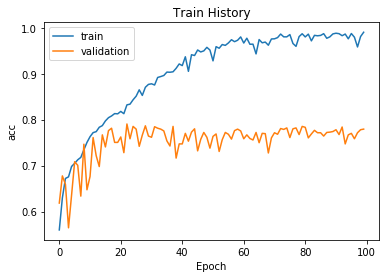

In [3]:
show_plot('acc', train_history)

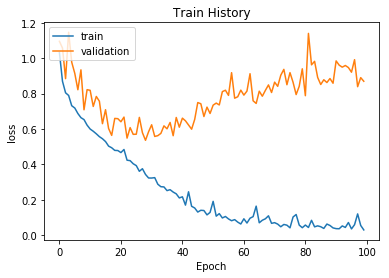

In [4]:
show_plot('loss', train_history)

## 3. ACC & LOSS & Confusion Matrix using 5:2:3

Using original spect

In [4]:
evaluation = model.evaluate(x = trainData, y = trainLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

5078/5078 [==============================] - 1s 287us/step
Loss: 0.483, Accuracy: 0.827


In [5]:
evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

3041/3041 [==============================] - 1s 287us/step
Loss: 0.668, Accuracy: 0.749


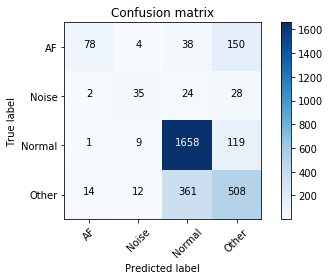

In [7]:
from sklearn.metrics import confusion_matrix

test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(testL, test_prediction)
plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'],
                      title='Confusion matrix')

Using RGB spect

In [2]:
evaluation = model.evaluate(x = X_train, y = y_train)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

7613/7613 [==============================] - 5s 609us/step
Loss: 0.203, Accuracy: 0.940


In [3]:
evaluation = model.evaluate(x = X_test, y = y_test)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

2538/2538 [==============================] - 2s 688us/step
Loss: 0.656, Accuracy: 0.787


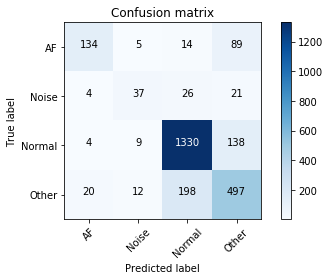

In [6]:
from sklearn.metrics import confusion_matrix

test_prediction = model.predict_classes(X_test, batch_size=1)
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), test_prediction)
plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'],
                      title='Confusion matrix')

## 4. ACC & LOSS & Confusion Matrix using 5-fold

Using original spect

In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/2D_spect/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/2D_spect/validate_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/2D_spect/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)
trainD = np.append(trainD, testD, axis=0)
trainL = np.append(trainL, testL, axis=0)

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], trainD.shape[2], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
# print('Train Data:', trainData.shape)
# print('Train Label: ', trainLabel.shape)
trainData, trainLabel = shuffle(trainData, trainLabel, random_state=0)

#--------------------------------------------

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
# print(kf)

#--------------------------------------------

from sklearn.metrics import f1_score

def create_model():
    model = Sequential() 
    model.add(Conv2D(filters = 32, kernel_size = 3, data_format="channels_last", input_shape = (trainData.shape[1], trainData.shape[2], 1)))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
    model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
    model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(160, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(4, activation = "softmax"))
    
    model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=['accuracy'])

    return model

fold = 1

for train_index, test_index in kf.split(trainData):
    
    print('{}-Fold'.format(fold))
    model = create_model()
#     early_stop = EarlyStopping(patience=20)
    history = model.fit(x = trainData[train_index],
                        y = trainLabel[train_index],
                        epochs=100,
                        validation_data=(trainData[test_index], trainLabel[test_index]),
#                         callbacks=[early_stop],
                        batch_size=70, 
                        verbose=0)
    
    evaluation = model.evaluate(x = trainData[train_index], y = trainLabel[train_index])
    print('Training:')
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
#     test_prediction = model.predict_classes(trainData[train_index], batch_size=1)
#     cnf_matrix = confusion_matrix(trainLabel[train_index].argmax(axis=1), test_prediction)
#     plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'],
#                       title='Confusion matrix')
    
    evaluation = model.evaluate(x = trainData[test_index], y = trainLabel[test_index])
    print('Testing:')
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
#     test_prediction = model.predict_classes(trainData[test_index], batch_size=1)
#     cnf_matrix = confusion_matrix(trainLabel[test_index].argmax(axis=1), test_prediction)
#     plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'],
#                       title='Confusion matrix')
    
    validation_prediction = model.predict_classes(trainData[test_index], batch_size=100)
    validation_prediction = np_utils.to_categorical(validation_prediction, 4)
    result = f1_score(trainLabel[test_index], validation_prediction, average=None)
    print('F1-score:')
    print(result)
    
    fold = fold + 1
    del model
    

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1-Fold
8120/8120 [==============================] - 2s 244us/step
Training:
Loss: 0.509, Accuracy: 0.828
2031/2031 [==============================] - 1s 257us/step
Testing:
Loss: 0.615, Accuracy: 0.773
F1-score:
[0.54545455 0.46428571 0.88161994 0.6121673 ]
2-Fold
8121/8121 [==============================] - 2s 261us/step
Training:
Loss: 0.550, Accuracy: 0.781
2030/2030 [==============================] - 1s 259us/step
Testing:
Loss: 0.668, Accuracy: 0.738
F1-score:
[0.19387755 0.44230769 0.85941043 0.57271095]
3-Fold
8121/8121 [==============================] - 2s 231us/step
Training:
Loss: 0.993, Accuracy: 0.589
2030/2030 [==============================] - 0s 221us/step
Testing:
Loss: 0.989, Accuracy: 0.581


/home/hsiehch/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1-score:
[0.         0.         0.73480835 0.        ]
4-Fold
8121/8121 [==============================] - 2s 257us/step
Training:
Loss: 0.531, Accuracy: 0.795
2030/2030 [==============================] - 0s 231us/step
Testing:
Loss: 0.661, Accuracy: 0.752
F1-score:
[0.4911032  0.47933884 0.85932139 0.58357488]
5-Fold
8121/8121 [==============================] - 2s 244us/step
Training:
Loss: 0.677, Accuracy: 0.718
2030/2030 [==============================] - 0s 221us/step
Testing:
Loss: 0.729, Accuracy: 0.709
F1-score:
[0.08333333 0.37681159 0.84534589 0.49309665]


Using RGB spect

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
np.set_printoptions(suppress=True)

data = np.load("/home/hsiehch/30s/2D_spect_img/data_RGB.npy")
labels = np.load('/home/hsiehch/30s/2D_spect_img/labels.npy')

data = data / 255
labels = np_utils.to_categorical(labels, 4)

print(data.shape)
print(labels.shape)

#--------------------------------------------

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

#--------------------------------------------

from sklearn.metrics import f1_score

def create_model():
    model = Sequential() 
    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same', data_format="channels_last", input_shape = (data.shape[1], data.shape[2], 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(filters = 64, kernel_size = 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(160, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(4, activation = "softmax"))
    
    adam = Adam(lr=0.0005)
    model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

    return model

fold = 1

for train_index, test_index in kf.split(data):
    
    print('{}-Fold'.format(fold))
    model = create_model()
    early_stop = EarlyStopping(patience=20)
    history = model.fit(x = data[train_index],
                        y = labels[train_index],
                        epochs=100,
                        validation_data=(data[test_index], labels[test_index]),
                        callbacks=[early_stop],
                        batch_size=70, 
                        verbose=0)
    
    evaluation = model.evaluate(x = data[train_index], y = labels[train_index])
    print('Training:')
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
    
    evaluation = model.evaluate(x = data[test_index], y = labels[test_index])
    print('Testing:')
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
    
    validation_prediction = model.predict_classes(data[test_index], batch_size=100)
    validation_prediction = np_utils.to_categorical(validation_prediction, 4)
    result = f1_score(labels[test_index], validation_prediction, average=None)
    print('F1-score:')
    print(result)
    
    fold = fold + 1
    del model
    

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(10151, 59, 151, 3)
(10151, 4)
1-Fold
8120/8120 [==============================] - 5s 579us/step
Training:
Loss: 0.197, Accuracy: 0.928
2031/2031 [==============================] - 1s 611us/step
Testing:
Loss: 0.685, Accuracy: 0.771
F1-score:
[0.66504854 0.49612403 0.86519115 0.61969112]
2-Fold
8121/8121 [==============================] - 5s 610us/step
Training:
Loss: 0.238, Accuracy: 0.917
2030/2030 [==============================] - 1s 628us/step
Testing:
Loss: 0.608, Accuracy: 0.785
F1-score:
[0.66480447 0.56976744 0.87340764 0.64636542]
3-Fold
8121/8121 [==============================] - 5s 610us/step
Training:
Loss: 0.250, Accuracy: 0.897
2030/2030 [==============================] - 1s 583us/step
Testing:
Loss: 0.813, Accuracy: 0.769
F1-score:
[0.58483755 0.5511811  0.8553987  0.62608696]
4-Fold
8121/8121 [==============================] - 5s 580us/step
Training:
Loss: 0.303, Accuracy: 0.928
2030/2030 [==============================] - 1s 574us/step
Testing:
Loss: 0.542, Accuracy:

## 5. Grid Search

Using original spect

* See Appendix 2 - lr & bs-2D-original_arr.ipynb

Using RGB spect

* See Appendix 2 - lr & bs-2D-RGB.ipynb

## 6. F1-score

Using original spect

* See above
* See Appendix 2 - f1 score-2D-original_arr.ipynb

Using RGB spect

* See above
* See Appendix 2 - f1 score-2D-RGB.ipynb